# Working notebook for Generalized Linear Regressions (GLMs)

Note: This notebook is based on the LinearRegressions notebook, adapted for GLMs. GLM related updates can be pushed here for now to keep them separate from linear regression updates. 

## 1. Preparing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#print options to data exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
# # run if using google colab 
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#everyone can set their own while working. Personally I leave this blank because relative works for me
personal_path = '/Users/dprinster/Documents/JHU_2021Fall/MachineLearning/ml_final_project-main/'

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib notebook 

imported_df = pd.read_csv(personal_path + 'Data/full_imputed_smoothed_per_million.csv')

# Get the names of our variables of interest 
X_cols = ['Beta', 'Epsilon', 'Gamma', 'Kappa', 'Iota',
       'Eta', 'Delta', 'Alpha', 'non_who', 'Lambda', 'Mu', 
       'total_vaccinations_per_hundred', 'gdp_per_capita', 
       'aged_70_older', 'life_expectancy']
y_cases_col = ['new_cases_smoothed_per_million']
y_deaths_col = ['new_deaths_smoothed_per_million']

# Create data frames with only the variables of interest
X_df = imported_df[X_cols]
y_cases_df = imported_df[y_cases_col]
y_deaths_df = imported_df[y_deaths_col]

## 2. GLM

The link function "links" the predictors to the response variable, and it is sensitive to the distribution of the response variable. So, we plot the response variable distirbution below to decide what link function to use for the GLM. The histogram for the response variable "new_cases_smoothed_per_million" looks like a Poisson or Negative Binomial distribution, both of which are used for modeling counts data (where the outcomes are natural numbers), so at first glance either a Poisson or Negative Binomial regression might be worth exploring. However, the Poisson regression makes a strict assumption that the mean and the variance of the response are equal (which is often not true in practice), whereas the Negative Binomial distribution is more flexible by lacking this assumption. So, we proceed with a Negative Binomial regression.



size of X_cases after removing zero entries for GLM:  (2208, 14)
size of y_cases after removing zero entries for GLM:  (2208, 1)


<IPython.core.display.Javascript object>


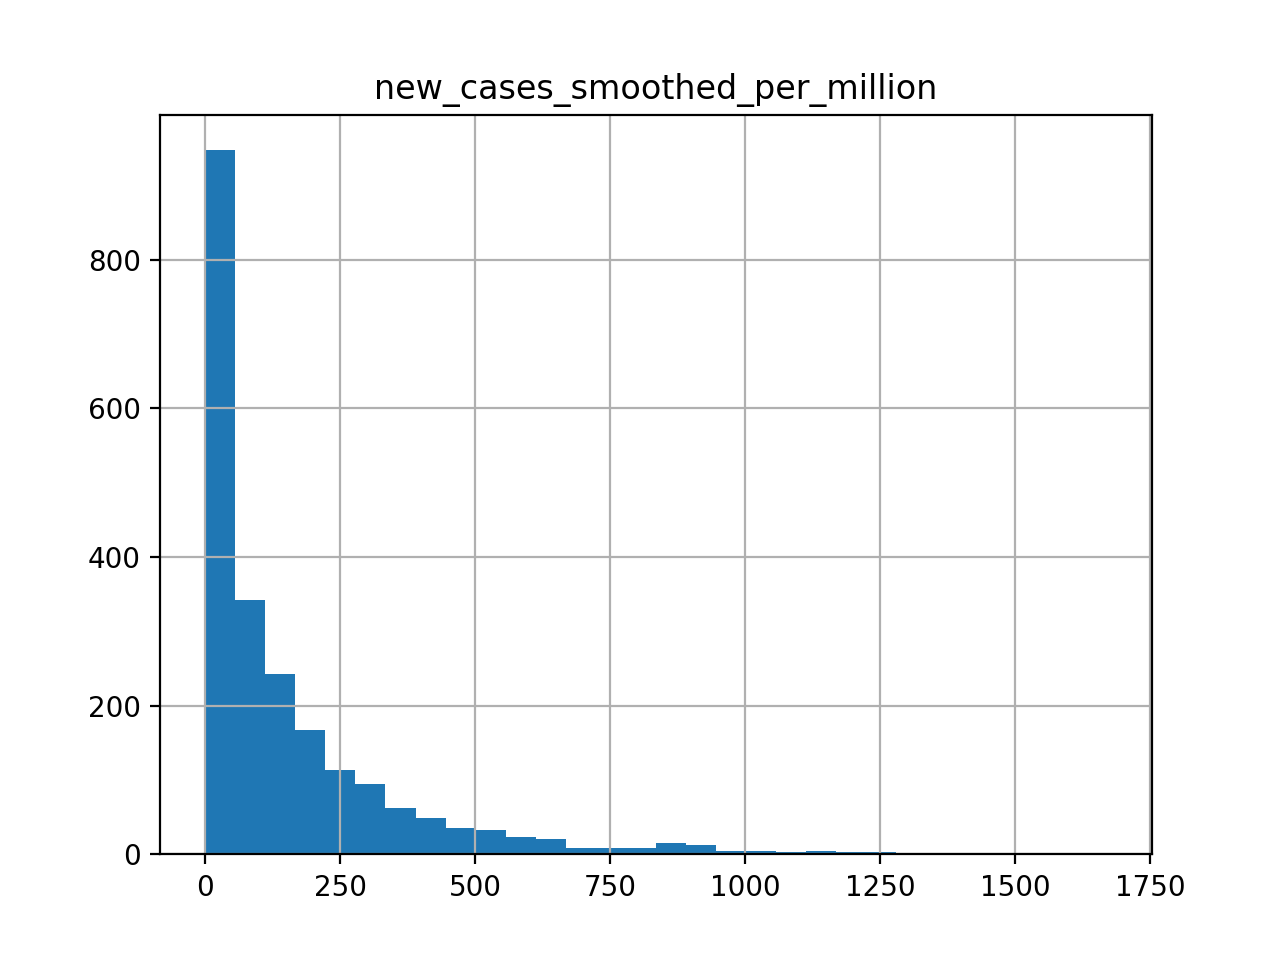

array([[<AxesSubplot:title={'center':'new_cases_smoothed_per_million'}>]],
      dtype=object)

In [5]:
## Prepare data for GLM and plot histogram

#model via statsmodels
import statsmodels.api as sm
X_cases = X_df.drop(['non_who'], axis=1)
y_cases = y_cases_df

## Only samples with outcomes greater than 0 make sense for Negative Binomial GLM, which assumes that outcome is counts data
X_cases = X_cases.loc[(y_cases>0).any(axis=1),:]
print('size of X_cases after removing zero entries for GLM: ', X_cases.shape)
y_cases = y_cases.loc[(y_cases>0).any(axis=1)]
print('size of y_cases after removing zero entries for GLM: ', y_cases.shape)

y_cases.hist(bins=30)

Note that r^2 doesn't have the same direct interpretation for a GLM as for an ordinary linear regression, so we will need to use other measures of goodness of fit to compare the linear regression and GLM results. 

In [6]:
## Run GLM

X2 = sm.add_constant(X_cases)
est = sm.GLM(y_cases, X2,family=sm.families.NegativeBinomial())
est2 = est.fit()
print(est2.summary())

                       Generalized Linear Model Regression Results                        
Dep. Variable:     new_cases_smoothed_per_million   No. Observations:                 2208
Model:                                        GLM   Df Residuals:                     2193
Model Family:                    NegativeBinomial   Df Model:                           14
Link Function:                                log   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -13149.
Date:                            Fri, 10 Dec 2021   Deviance:                       3749.6
Time:                                    01:51:17   Pearson chi2:                 3.92e+03
No. Iterations:                                15                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025    

/Users/dprinster/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
